In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
cwd = os.getcwd()
import librosa
import librosa.display
import numpy as np
import pandas as pd
import natsort
import matplotlib.pyplot as plt
import scipy


In [15]:
wavDir = '/content/drive/MyDrive/Multimedia_Systems/Lab-2/dataset/ff1010bird_wav/wav/'
# read audio files

listofwavs = os.listdir(wavDir)
print(len(listofwavs))

sortwavdir = natsort.natsorted(listofwavs, reverse=False)
print(sortwavdir)

7690
['99.wav', '100.wav', '104.wav', '156.wav', '345.wav', '347.wav', '349.wav', '369.wav', '370.wav', '371.wav', '376.wav', '377.wav', '378.wav', '518.wav', '1042.wav', '1043.wav', '1044.wav', '1045.wav', '1046.wav', '1050.wav', '1051.wav', '1052.wav', '1053.wav', '1054.wav', '1055.wav', '1056.wav', '1748.wav', '1931.wav', '1932.wav', '1933.wav', '1934.wav', '1945.wav', '2151.wav', '2155.wav', '2157.wav', '2421.wav', '2432.wav', '2435.wav', '2519.wav', '2520.wav', '2521.wav', '2522.wav', '2523.wav', '2524.wav', '2525.wav', '2526.wav', '2527.wav', '2528.wav', '2529.wav', '2530.wav', '2531.wav', '2532.wav', '2533.wav', '2534.wav', '2535.wav', '2536.wav', '2537.wav', '2689.wav', '3093.wav', '3126.wav', '3177.wav', '3178.wav', '3179.wav', '3180.wav', '3182.wav', '3183.wav', '3184.wav', '3185.wav', '3186.wav', '3187.wav', '3188.wav', '3189.wav', '3190.wav', '3191.wav', '3202.wav', '5204.wav', '5560.wav', '5929.wav', '5996.wav', '5997.wav', '6108.wav', '7126.wav', '7133.wav', '7151.wav', '

In [16]:
sampleAll = []
import librosa
for i in range(len(sortwavdir)):
  path2Audio = wavDir + sortwavdir[i]
  audio,sr = librosa.load(path2Audio)
  fourSecSample= audio[4*sr:8*sr] #take 4 second from each sample
  #print(sortwavdir[i], sr, len(audio)/sr)
  sampleAll.append(fourSecSample)

In [17]:
sampleAll = np.asarray(sampleAll)
print(type(sampleAll),np.shape(audio))

<class 'numpy.ndarray'> (220500,)


In [18]:
# Load Label

labeldir = '/content/drive/MyDrive/Multimedia_Systems/Lab-2/dataset/ff1010bird_wav/ff1010bird_metadata.csv'

df = pd.read_csv(labeldir, header = None,  skiprows=1)
data = df.values
# Sort the labels
sortedArr = data[data[:,0].argsort()]

# Lets separate the file name and labels

sortedLabel = sortedArr[:,1]
sortedfilename  = sortedArr[:,0]

print(sortedfilename[0:7692])
label = sortedLabel[0:7692]
print(label)
label.shape

[    55     87     99 ... 195598 195739 195862]
[0 0 0 ... 0 0 0]


(7690,)

In [19]:
def Feature_Extraction(samples):
  allFeature=[]
  for frame in range(len(samples)):
    # print(frame)
    OneSample=samples[frame,:]
    ###MFCC
    feature_mfcc=librosa.feature.mfcc(y=OneSample, sr=sr,n_mfcc=13,  hop_length=len(OneSample)+1)  
    ### energy
    feature_eng=np.sum(np.square(OneSample)).reshape(-1,1)
    ####ZCR
    feature_zcr=librosa.feature.zero_crossing_rate(OneSample,hop_length=len(OneSample)+1)  

    featuresOneFrame=np.concatenate((feature_mfcc,feature_eng,feature_zcr),axis = 0)  
    allFeature.append(featuresOneFrame)
  return allFeature

In [20]:
#concatenate the extracted features with existing dataset
features = Feature_Extraction(sampleAll)
features = np.asarray(features)
features = np.reshape(features,(features.shape[0],features.shape[1]))
features.shape

(7690, 15)

In [21]:
print(label.shape)

(7690,)


In [22]:
#Split the dataset into train and test (80:20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, train_size = 0.8,
                                                    random_state = 101, shuffle = True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6152, 15) (1538, 15)
(6152,) (1538,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d1 (Dense)                  (None, 12)                192       
                                                                 
 d2 (Dense)                  (None, 8)                 104       
                                                                 
 d3 (Dense)                  (None, 4)                 36        
                                                                 
 out (Dense)                 (None, 1)                 5         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None


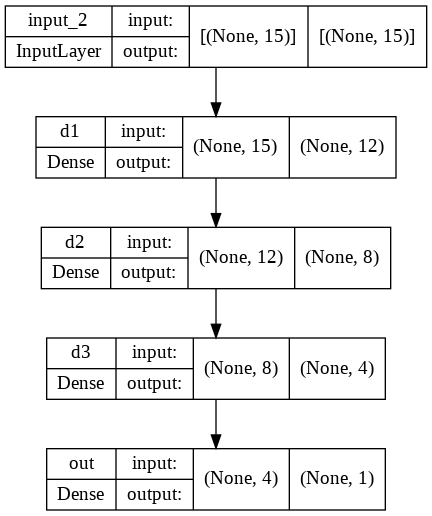

In [23]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

my_model = Sequential()
my_model.add(Input(shape=(15,)))
my_model.add(Dense(12, activation='relu',name='d1'))
my_model.add(Dense(8, activation='relu',name='d2'))
my_model.add(Dense(4, activation='relu',name='d3'))
# my_model.add(Dense(3, activation='softmax',name='out'))##if 3-class classification
my_model.add(Dense(1, activation='sigmoid',name='out')) ##if 2-class classification

# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 15)]              0         
                                                                 
 hid1 (Dense)                (None, 8)                 128       
                                                                 
 hid2 (Dense)                (None, 4)                 36        
                                                                 
 hid3 (Dense)                (None, 2)                 10        
                                                                 
 modelOutput (Dense)         (None, 1)                 3         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None


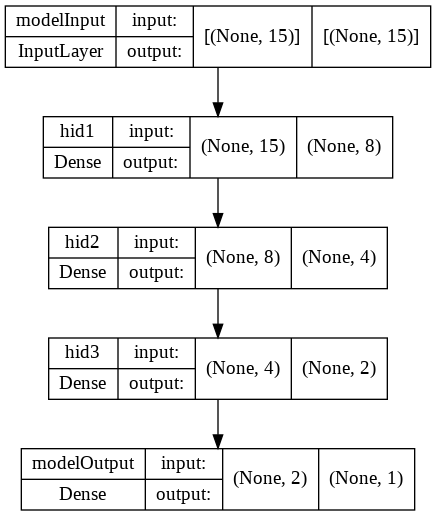

In [24]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#visible = Input(shape=(sampleAll.shape[1],),name='modelInput')
visible = Input(15,name='modelInput')
hidden1 = Dense(8, activation='relu',name='hid1')(visible)
hidden2 = Dense(4, activation='relu',name='hid2')(hidden1)
hidden3 = Dense(2, activation='relu',name='hid3')(hidden2)

# output = Dense(3, activation='softmax',name='modelOutput')(hidden3)##if 3-class classification
output = Dense(1, activation='sigmoid',name='modelOutput')(hidden3)##if 2-class classification

fun_model = Model(inputs=visible, outputs=output)
# summarize layers
print(fun_model.summary())
# plot graph
plot_model(fun_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)


In [25]:
# compile the keras model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam

In [50]:
# my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae'])
fun_model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.01), metrics=['accuracy','mse','mae'])

In [51]:
# fit the keras model on the dataset
my_history=fun_model.fit(X_train, y_train, epochs=10, batch_size=4,verbose=1, validation_split=0.1)

Epoch 1/10
1384/1384 [==============================] - 5s 3ms/step - loss: 0.5660 - accuracy: 0.7475 - mse: 0.1891 - mae: 0.3759 - val_loss: 0.5514 - val_accuracy: 0.7597 - val_mse: 0.1826 - val_mae: 0.3630
Epoch 2/10
1384/1384 [==============================] - 4s 3ms/step - loss: 0.5653 - accuracy: 0.7475 - mse: 0.1888 - mae: 0.3760 - val_loss: 0.5542 - val_accuracy: 0.7597 - val_mse: 0.1835 - val_mae: 0.3490
Epoch 3/10
1384/1384 [==============================] - 5s 3ms/step - loss: 0.5662 - accuracy: 0.7475 - mse: 0.1892 - mae: 0.3734 - val_loss: 0.5518 - val_accuracy: 0.7597 - val_mse: 0.1827 - val_mae: 0.3716
Epoch 4/10
1384/1384 [==============================] - 4s 3ms/step - loss: 0.5657 - accuracy: 0.7475 - mse: 0.1890 - mae: 0.3751 - val_loss: 0.5521 - val_accuracy: 0.7597 - val_mse: 0.1828 - val_mae: 0.3737
Epoch 5/10
1384/1384 [==============================] - 4s 3ms/step - loss: 0.5657 - accuracy: 0.7475 - mse: 0.1890 - mae: 0.3752 - val_loss: 0.5520 - val_accuracy: 0.7

In [57]:
def plot(title, a, b, c, d, e, f):

  plt.subplot(211)
  plt.title(title)
  plt.plot(my_history.history[a],label = b)
  plt.plot(my_history.history[c],label = d)
  plt.xlabel(e)
  plt.ylabel(f)
  plt.legend()
  plt.show()

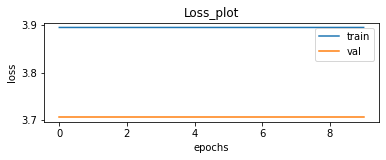

In [58]:
plot('Loss_plot', 'loss', 'train', 'val_loss', 'val', 'epochs', 'loss')

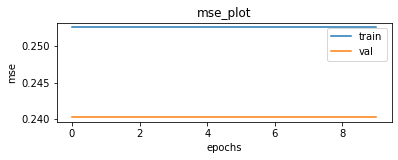

In [59]:
plot('mse_plot', 'mse', 'train', 'val_mse', 'val', 'epochs', 'mse')

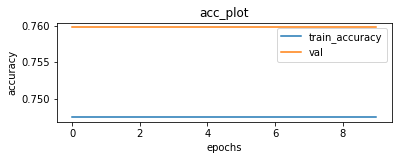

In [60]:
plot('acc_plot', 'accuracy', 'train_accuracy', 'val_accuracy', 'val', 'epochs', 'accuracy')

In [61]:
import keras

#### make class predictions with the model
y_pred = fun_model.predict(X_test)
#########direct evaluaion
score = fun_model.evaluate(X_test, y_test)
print(score[1])

49/49 [==============================] - 0s 3ms/step - loss: 3.9014 - accuracy: 0.7471 - mse: 0.2529 - mae: 0.2529
0.7470741271972656


In [83]:
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("------------Confusion Matrix------------\n")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

------------Confusion Matrix------------

[[1149    0]
 [ 389    0]]
0.747074122236671


In [63]:
# save model and architecture to single file
fun_model.save("fun_model.h5")
print("Saved model to disk")
 
# later...
 
from keras.models import load_model
 
# load model
fun_model = load_model('fun_model.h5')

Saved model to disk


In [64]:
score = fun_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (fun_model.metrics_names[1], score[1]*100))

49/49 [==============================] - 0s 3ms/step - loss: 3.9014 - accuracy: 0.7471 - mse: 0.2529 - mae: 0.2529
accuracy: 74.71%


#Another variant of NN

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d1 (Dense)                  (None, 12)                192       
                                                                 
 d2 (Dense)                  (None, 8)                 104       
                                                                 
 d3 (Dense)                  (None, 4)                 36        
                                                                 
 out (Dense)                 (None, 3)                 15        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
None


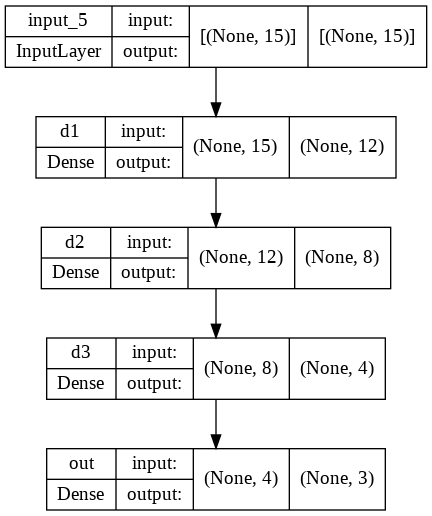

In [72]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

my_model = Sequential()
my_model.add(Input(shape=(15,)))
my_model.add(Dense(12, activation='relu',name='d1'))
my_model.add(Dense(8, activation='relu',name='d2'))
my_model.add(Dense(4, activation='relu',name='d3'))
#my_model.add(Dense(3, activation='softmax',name='out'))##if 3-class classification
my_model.add(Dense(3, activation='sigmoid',name='out')) ##if 2-class classification

# summarize layers
print(my_model.summary())
# plot graph
plot_model(my_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modelInput (InputLayer)     [(None, 15)]              0         
                                                                 
 hid1 (Dense)                (None, 8)                 128       
                                                                 
 hid2 (Dense)                (None, 4)                 36        
                                                                 
 hid3 (Dense)                (None, 2)                 10        
                                                                 
 modelOutput (Dense)         (None, 1)                 3         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None


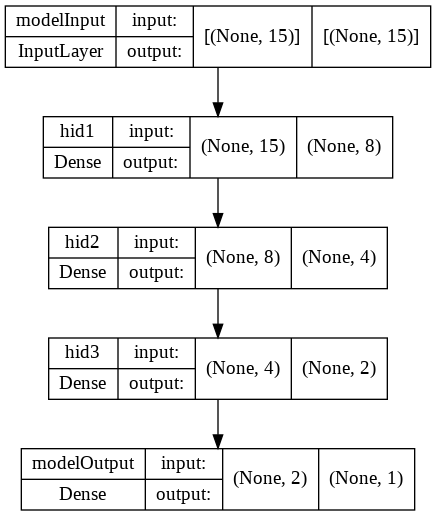

In [73]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#visible = Input(shape=(sampleAll.shape[1],),name='modelInput')
visible = Input(15,name='modelInput')
hidden1 = Dense(8, activation='relu',name='hid1')(visible)
hidden2 = Dense(4, activation='relu',name='hid2')(hidden1)
hidden3 = Dense(2, activation='relu',name='hid3')(hidden2)
#output = Dense(1, activation='softmax',name='modelOutput')(visible) ##if 3-class classification

output = Dense(1, activation='sigmoid',name='modelOutput')(hidden3)##if 2-class classification

fun_model = Model(inputs=visible, outputs=output)
# summarize layers
print(fun_model.summary())
# plot graph
plot_model(fun_model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

In [74]:
# compile the keras model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam

In [92]:
#my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae'])
fun_model.compile(loss='binary_crossentropy', optimizer=Nadam(learning_rate=0.02), metrics=['accuracy','mse','mae'])

In [93]:
# fit the keras model on the dataset
my_history=fun_model.fit(X_train, y_train, epochs=10, batch_size=4,verbose=3, validation_split=0.1)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [94]:
def plot(title, a, b, c, d, e, f):

  plt.subplot(211)
  plt.title(title)
  plt.plot(my_history.history[a],label = b)
  plt.plot(my_history.history[c],label = d)
  plt.xlabel(e)
  plt.ylabel(f)
  plt.legend()
  plt.show()

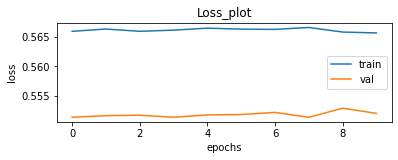

In [95]:
plot('Loss_plot', 'loss', 'train', 'val_loss', 'val', 'epochs', 'loss')

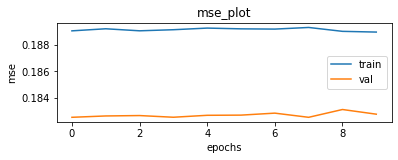

In [96]:
plot('mse_plot', 'mse', 'train', 'val_mse', 'val', 'epochs', 'mse')

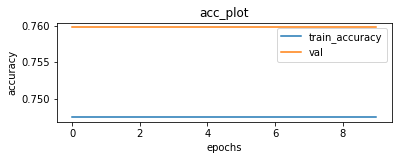

In [97]:
plot('acc_plot', 'accuracy', 'train_accuracy', 'val_accuracy', 'val', 'epochs', 'accuracy')

In [98]:
import keras

#### make class predictions with the model
y_pred = fun_model.predict(X_test)
#########direct evaluaion
score = fun_model.evaluate(X_test, y_test)
print(score[1])

49/49 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7471 - mse: 0.1897 - mae: 0.3640
0.7470741271972656


In [102]:
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("----------Confusion Matrix----------\n")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

----------Confusion Matrix----------

[[1149    0]
 [ 389    0]]
0.747074122236671


In [100]:
score = fun_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (fun_model.metrics_names[1], score[1]*100))

49/49 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7471 - mse: 0.1897 - mae: 0.3640
accuracy: 74.71%
